<h2>Assessment of Image Quality Assessment (IQA) Metrics in Detecting Compression Artifacts in Scientific Data Visualization<h2>

<h4>Compression artifacts occur when images or videos are compressed, leading to a loss of visual quality. In scientific data, preserving high visual fidelity is crucial for accurate analysis. This study evaluates how different compression levels affect image quality using various Image Quality Assessment (IQA) metrics.<h4>

<h4>We will perform a multivariate analysis by varying parameters such as compression levels, camera positions in ParaView, and opacity levels. The IQA metrics used include Structural Similarity Index (SSIM), Visual Saliency-induced Index (VSI), and Multi-Scale Gradient Magnitude Similarity Deviation (MS-GMSD). These metrics help assess structural integrity and perceptual fidelity, providing insights into the best compression methods for scientific data.<h4>

<h4>For this assesment we will use an example scientfic dataset of isotropic turbulence (link)<h4>
<h4>We will also make use of tensor compression (link)<h4>

<h2>Data Import<h2>

In [20]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import cv2

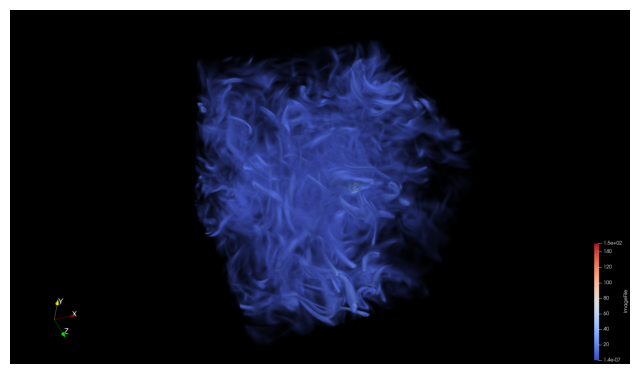

In [21]:
reference_image = cv2.imread("/Users/yetchi/Desktop/analysis/images/compressed_tthresh/tacc_turbulence_256x256x256_float32.png")
image_rgb = cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

<h2>How does Compression only affect image quality? How well can metric pick up changes if any? At what level of compression does the most changes in image quality occur<h2>

<h2>Lets compute some metrics<h2>

In [22]:
import pandas as pd
import sys
import cv2
from metrics import *

# Load the data
data = pd.read_csv("/Users/yetchi/Desktop/analysis/images/compressed_tthresh/processed_images.csv")
ref = "/Users/yetchi/Desktop/analysis/images/compressed_tthresh/tacc_turbulence_256x256x256_float32.png"
paths = data["image_path"].tolist()

color_spaces_to_use = ['RGB']

selected_metrics = {
    'SSIM': compute_ssim,
    'FSIM': compute_fsim,
    'MS-SSIM': compute_ms_ssim,
    'PSNR': compute_psnr,
    'VSI': compute_vsi,
    'SR-SIM': compute_srsim,
    'MS-GMSD': compute_msgmsd,
    "MDSI": compute_mdsi,
    "DSS": compute_dss,
    "IW-SSIM": compute_iw_ssim,
}

def resize_image(img, target_shape):
    return cv2.resize(img, (target_shape[1], target_shape[0]))

def compute_metrics_for_paths(distorted_images_paths, reference_image_path, selected_metrics, color_spaces_to_use):
    results = []

    ref_image = cv2.imread(reference_image_path)
    if ref_image is None:
        print(f"Error: Unable to load reference image from {reference_image_path}.")
        return None

    ref_shape = ref_image.shape[:2]  # Get the height and width of the reference image

    for dist_path in distorted_images_paths:
        dist_image = cv2.imread(dist_path)
        if dist_image is None:
            print(f"Error: Unable to load distorted image from {dist_path}. Skipping...")
            continue

        dist_image_resized = resize_image(dist_image, ref_shape)  # Resize distorted image to match ref_image

        metrics_result = {}
        for metric_name, metric_fn in selected_metrics.items():
            try:
                # Compute metric
                metric_value = metric_fn(dist_image_resized, ref_image)
                metrics_result[metric_name] = metric_value
            except Exception as e:
                print(f"Error computing {metric_name} for {dist_path}: {e}")
                continue
        
        # Collect results
        results.append({'image_path': dist_path, **metrics_result})

    # Convert to DataFrame
    df = pd.DataFrame(results)
    return df

# Compute metrics for paths
results_df = compute_metrics_for_paths(paths, ref, selected_metrics, color_spaces_to_use)

if results_df is not None:
    # Merge results with original data
    updated_data = data.merge(results_df, on='image_path', how='left')

    # Save updated CSV file
    updated_data.to_csv("compression_info_updated.csv", index=False)

print("Metrics computed and saved to 'compression_info_updated.csv'")


Metrics computed and saved to 'compression_info_updated.csv'


In [23]:
# precomputed data
data = pd.read_csv("/Users/yetchi/Desktop/analysis/compression_info_updated.csv")


<h3>MDSI<h3>

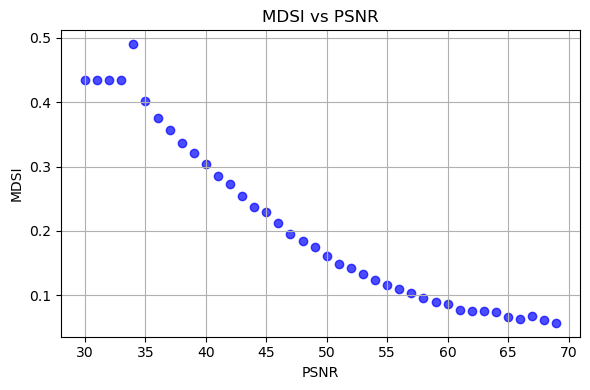

In [24]:
X = data["Threshold"]
y = data["MDSI"]

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', alpha=0.7)

plt.title('MDSI vs PSNR')
plt.xlabel('PSNR')
plt.ylabel('MDSI')
plt.grid(True)
plt.tight_layout()



# Show plo
plt.show()

<h3>SSIM<h3>

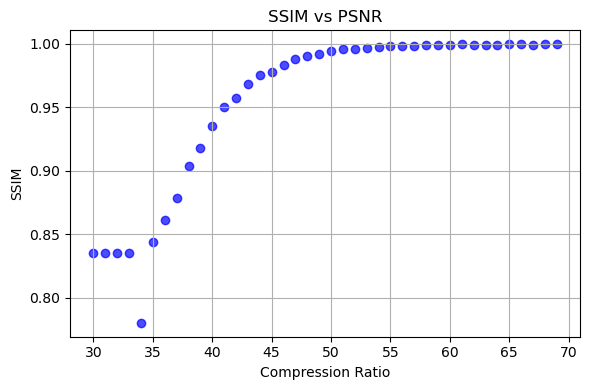

In [25]:
X = data["Threshold"]
y = data["SSIM"]

import matplotlib.pyplot as plt
import numpy as np



# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', alpha=0.7)

plt.title('SSIM vs PSNR')
plt.xlabel('Compression Ratio')
plt.ylabel('SSIM')
plt.grid(True)
plt.tight_layout()



# Show plot

<h3>FSIM<h3>

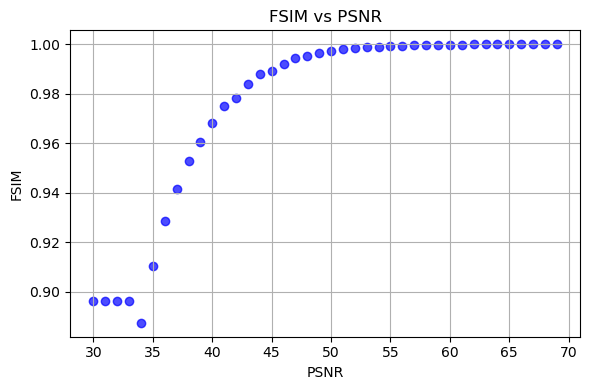

In [30]:

X = data["Threshold"]
y = data["FSIM"]


# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.title('FSIM vs PSNR')
plt.xlabel('PSNR')
plt.ylabel('FSIM')
plt.grid(True)
plt.tight_layout()



# Show plot
plt.show()

<h3>DSS<h3>

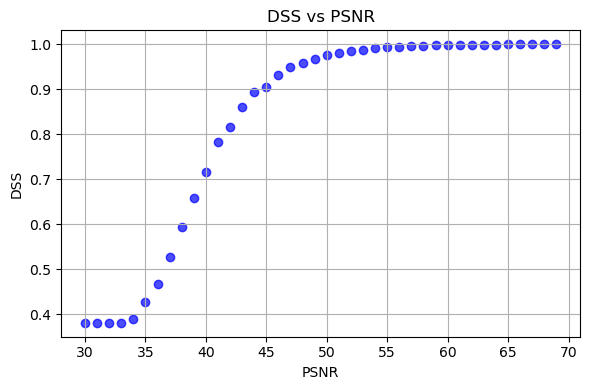

In [34]:
X = data["Threshold"]
y = data["DSS"]


# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', alpha=0.7)

plt.title('DSS vs PSNR')
plt.xlabel('PSNR')
plt.ylabel('DSS')
plt.grid(True)
plt.tight_layout()



# Show plot
plt.show()

<h2>Are the compression artifacts uniformly distributed? If not how well do these metric detect changes evaluated from different camera angles? 

<h3>We will use fibonacci sphere to pick 10 equal distant camera angles<h3>

<img src = "./misc/fibonacci.jpg">

<h2>Camera positions <h2>

<img src = "./misc/camerapos.png">

<h2>Lets compute some metrics<h2>

In [7]:
import pandas as pd
import cv2
from metrics import *

# Load the data
data = pd.read_csv("/Users/yetchi/Desktop/analysis/images/camera_positions/processed_images.csv")

# Define path columns
path_columns = [f"image_path_{i}" for i in range(1, 11)]

# Define corresponding reference images based on the first entry of each column
reference_images = {col: data[col][0] for col in path_columns}

selected_metrics = {
    'SSIM': compute_ssim,
    'FSIM': compute_fsim,
    'MS-SSIM': compute_ms_ssim,
    'VSI': compute_vsi,
    'SR-SIM': compute_srsim,
    'MS-GMSD': compute_msgmsd,
    "MDSI": compute_mdsi,
    "DSS": compute_dss,
    "IW-SSIM": compute_iw_ssim,
    "VIFp": compute_vifp,
    "GMSD": compute_gmsd,
}

def resize_image(img, target_shape):
    return cv2.resize(img, (target_shape[1], target_shape[0]))

def compute_metrics_for_paths(data, path_columns, reference_images, selected_metrics):
    results = []

    for idx, row in data.iterrows():
        metrics_result = {'image_index': idx}
        for path_col in path_columns:
            ref_image_path = reference_images[path_col]
            ref_image = cv2.imread(ref_image_path)
            if ref_image is None:
                print(f"Error: Unable to load reference image from {ref_image_path}.")
                continue

            ref_shape = ref_image.shape[:2]  # Get the height and width of the reference image

            dist_path = row[path_col]
            dist_image = cv2.imread(dist_path)
            if dist_image is None:
                print(f"Error: Unable to load distorted image from {dist_path}. Skipping...")
                continue

            dist_image_resized = resize_image(dist_image, ref_shape)  # Resize distorted image to match ref_image

            for metric_name, metric_fn in selected_metrics.items():
                try:
                    # Compute metric
                    metric_value = metric_fn(dist_image_resized, ref_image)
                    metrics_result[f"{metric_name}_{path_col}"] = metric_value
                except Exception as e:
                    print(f"Error computing {metric_name} for {dist_path}: {e}")
                    continue

        results.append(metrics_result)

    # Convert to DataFrame
    df = pd.DataFrame(results)
    return df

# Compute metrics for paths
results_df = compute_metrics_for_paths(data, path_columns, reference_images, selected_metrics)

if results_df is not None:
    # Merge results with original data
    updated_data = data.merge(results_df, left_index=True, right_on='image_index', how='left')
    updated_data.drop(columns=['image_index'], inplace=True)

    # Save updated CSV file
    updated_data.to_csv("compression_info_camerapos_updated.csv", index=False)

print("Metrics computed and saved to 'compression_info_camerapos_updated.csv'")


Metrics computed and saved to 'compression_info_camerapos_updated.csv'


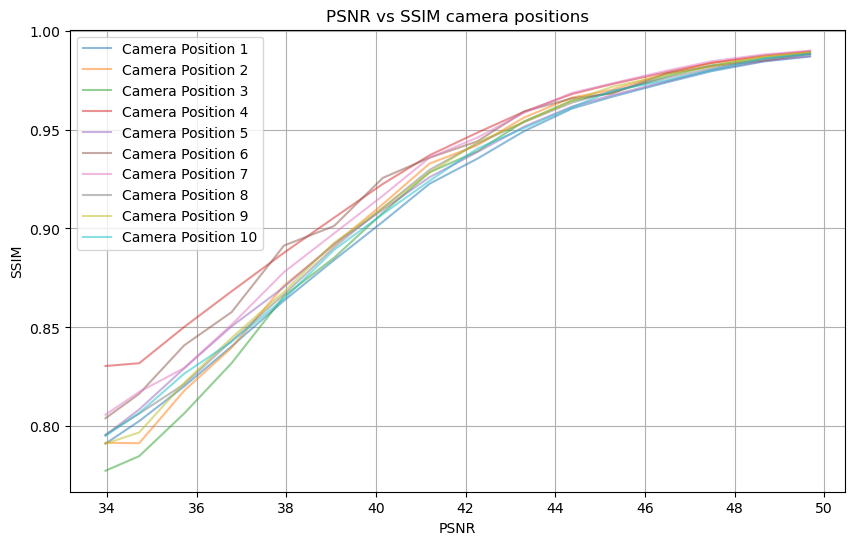

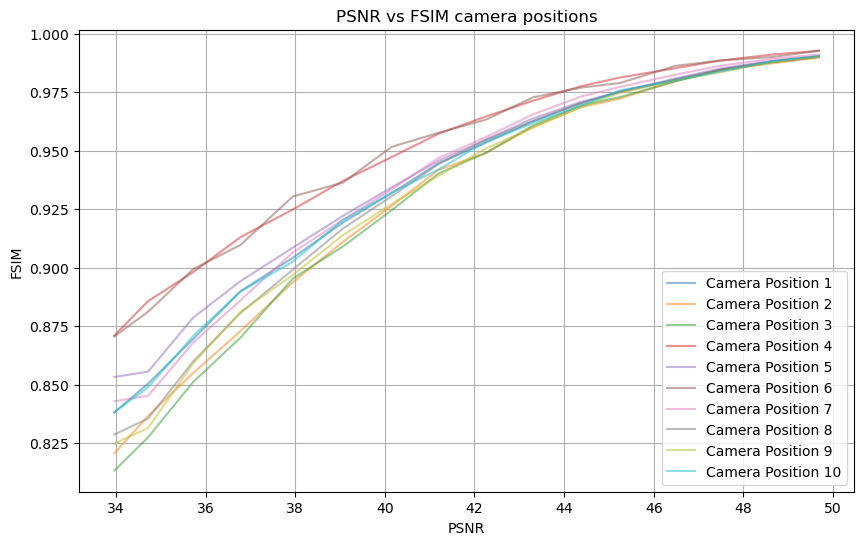

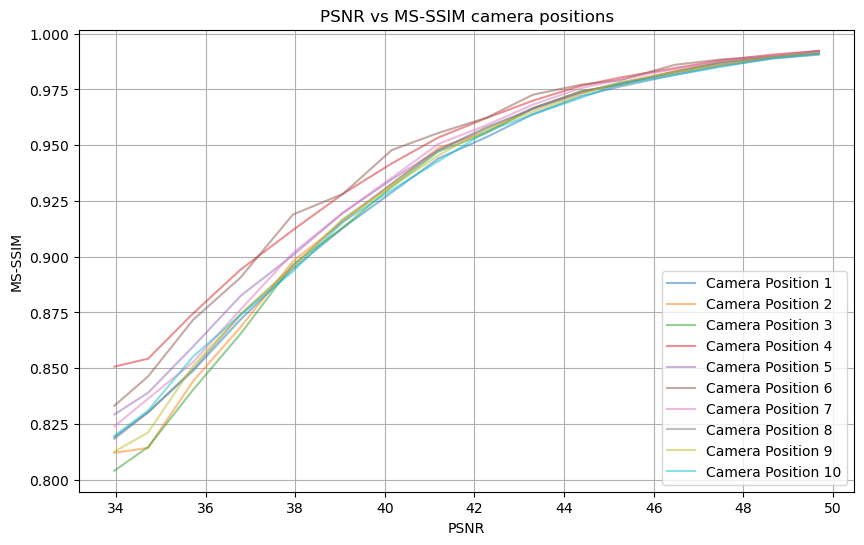

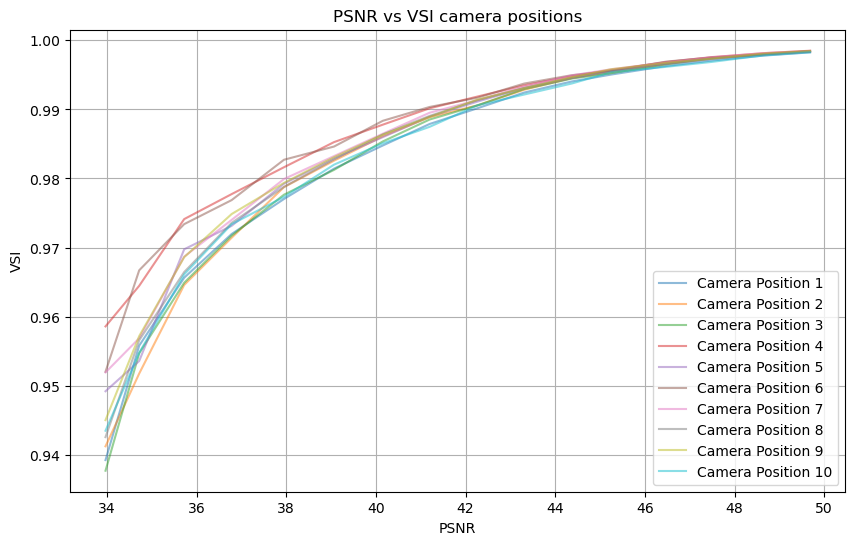

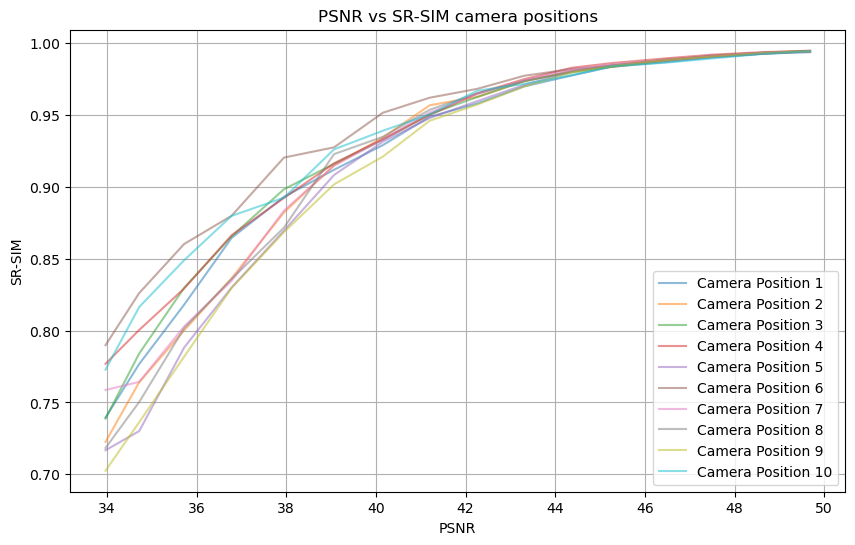

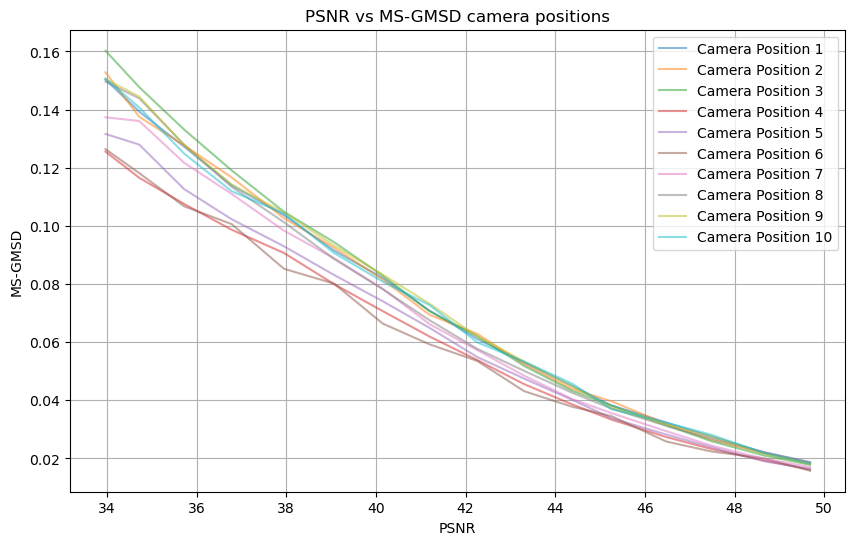

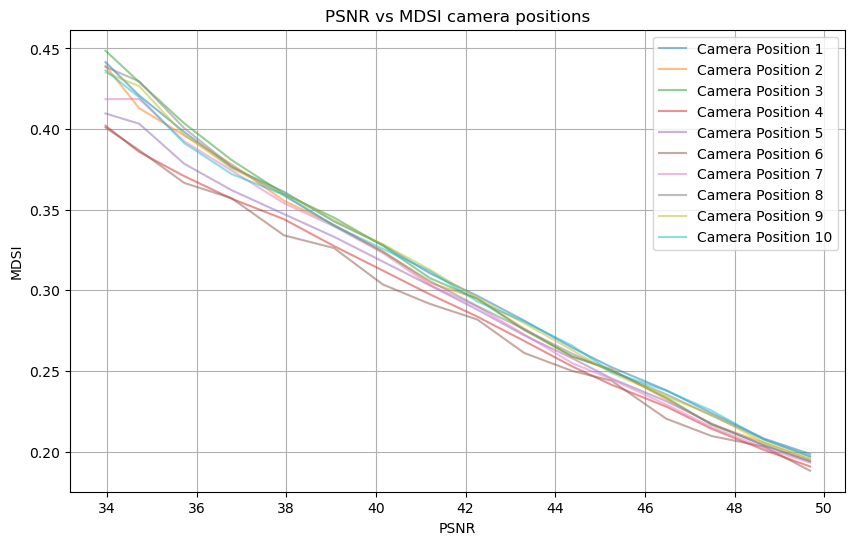

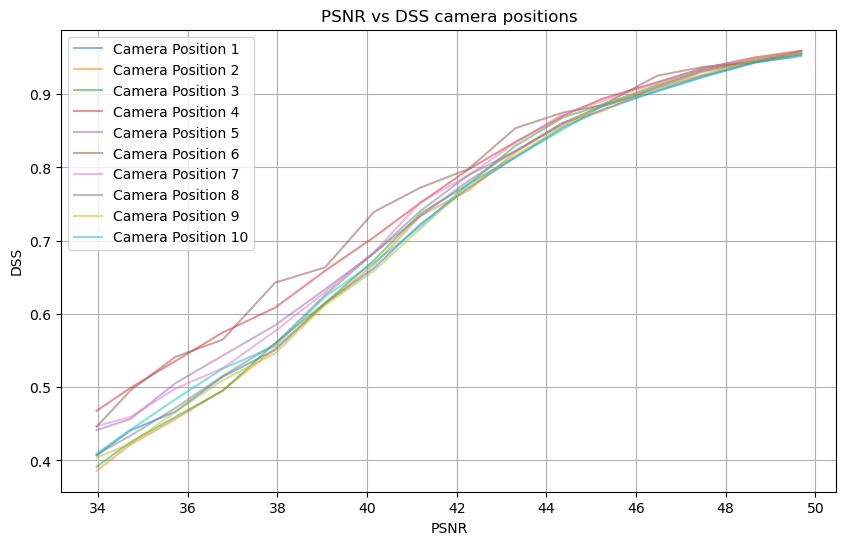

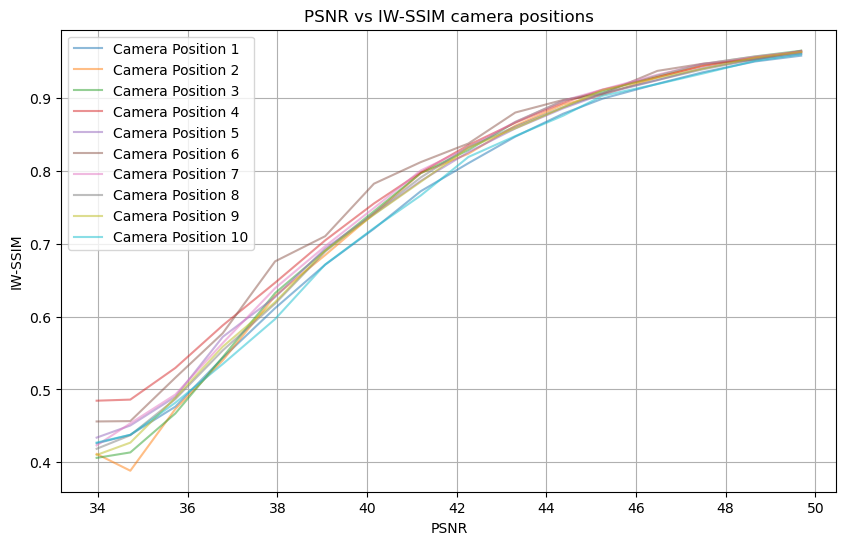

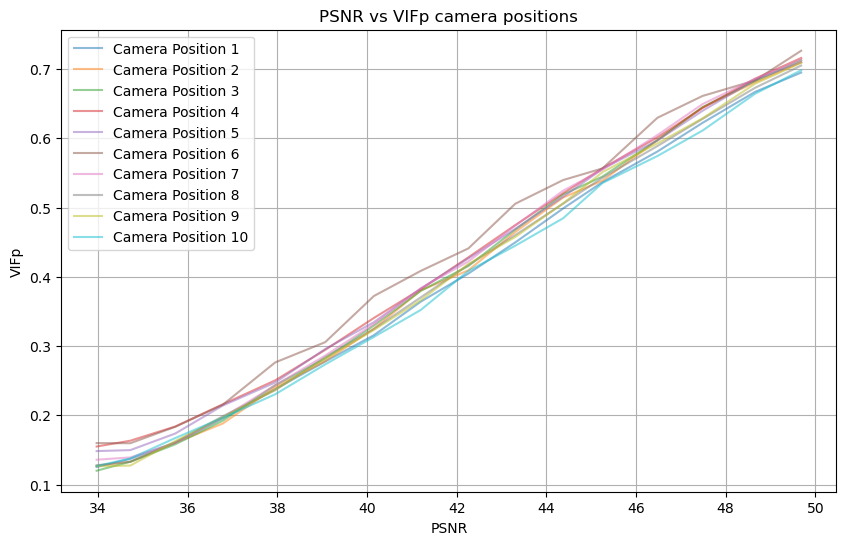

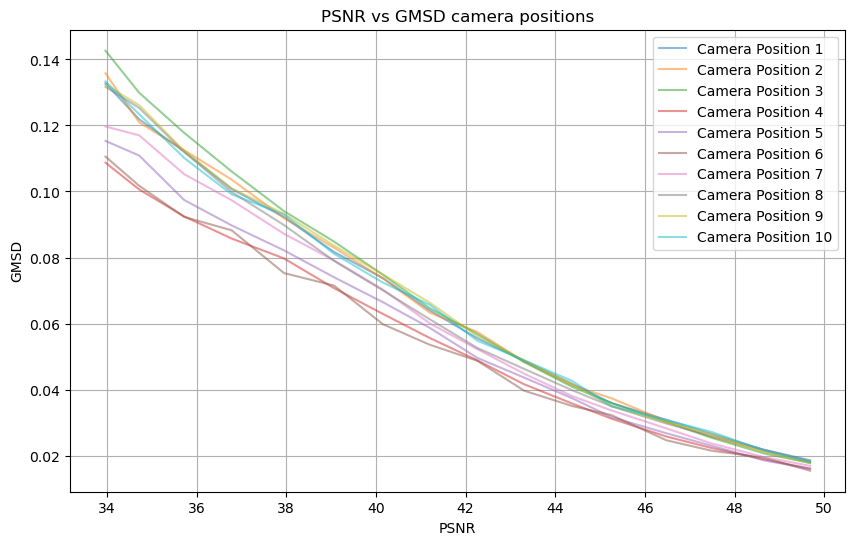

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated data
data = pd.read_csv("compression_info_camerapos_updated.csv")

data.drop(index=0, inplace=True)
data.drop(index=5, inplace=True)
data = data[data["PSNR"] <= 50]

# Define path columns
path_columns = [f"image_path_{i}" for i in range(1, 11)]

# List of metrics to plot against PSNR
metrics = ['SSIM', 'FSIM', 'MS-SSIM', 'VSI', 'SR-SIM', 'MS-GMSD', 'MDSI','DSS','IW-SSIM','VIFp','GMSD']

# Plot PSNR vs each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for i, path_col in enumerate(path_columns, start=1):
        metric_col = f"{metric}_{path_col}"
        
        if metric_col in data.columns:
            plt.plot(data["PSNR"], data[metric_col], alpha=0.5, label=f"Camera Position {i}")
        else:
            print(f"Column {metric_col} not found in the data.")
    
    plt.title(f'PSNR vs {metric} camera positions')
    plt.xlabel('PSNR')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()



<h2> Whats the distribution of metric values for different camera angles <h2>

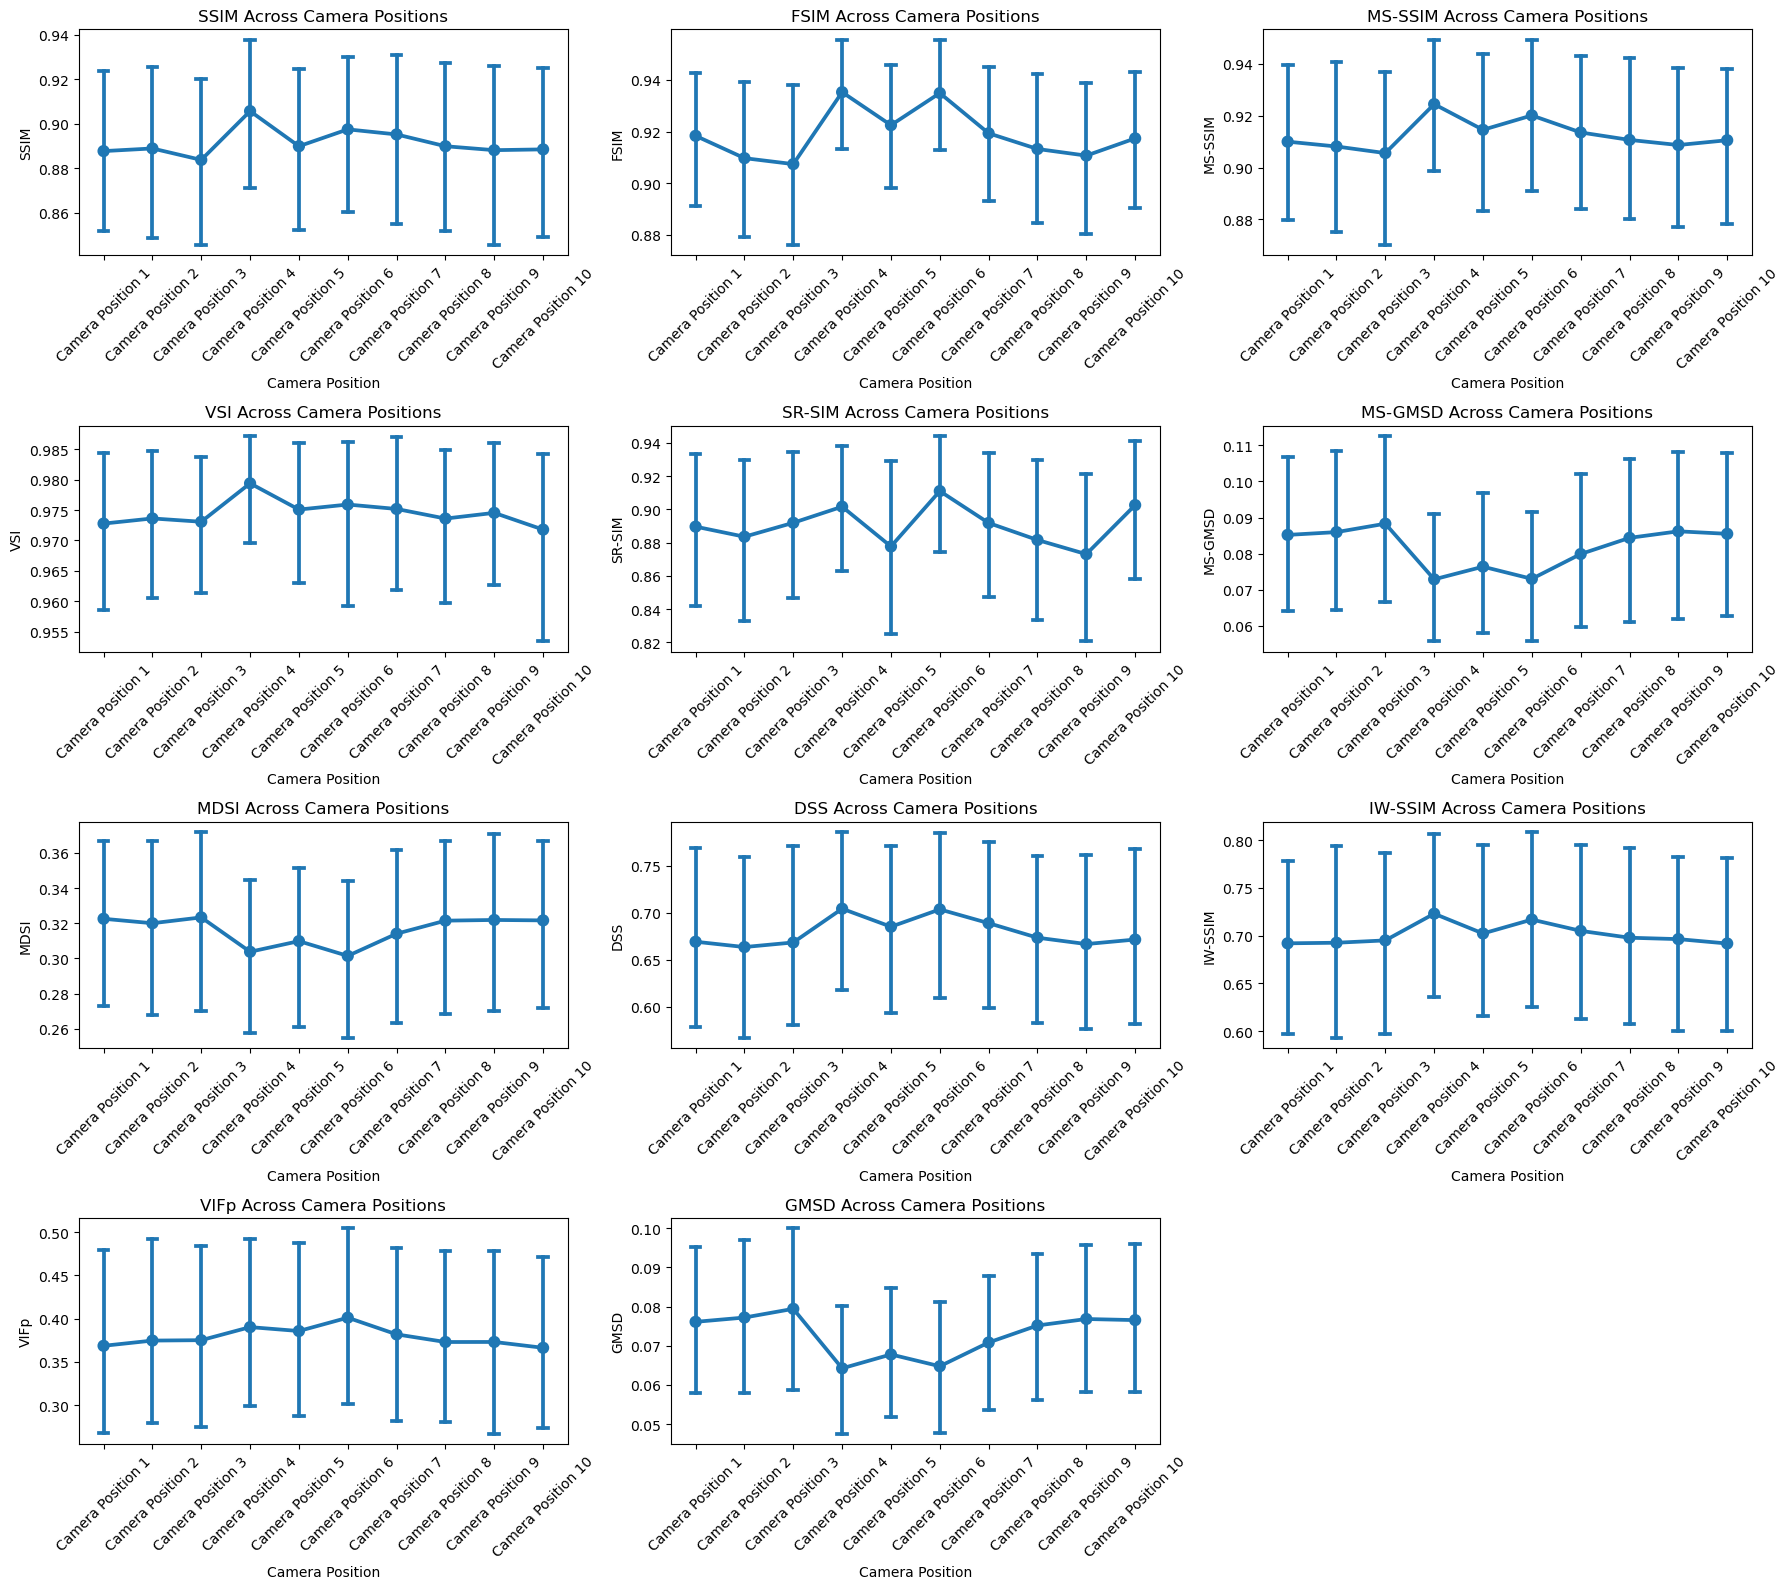

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated data
data = pd.read_csv("compression_info_camerapos_updated.csv")

# Drop rows where PSNR is greater than 50
data = data[data["PSNR"] <= 50]

# Define path columns
path_columns = [f"image_path_{i}" for i in range(1, 11)]

# List of metrics to plot against PSNR
metrics = ['SSIM', 'FSIM', 'MS-SSIM', 'VSI', 'SR-SIM', 'MS-GMSD', 'MDSI', 'DSS', 'IW-SSIM', 'VIFp', 'GMSD']

# Prepare data for plots
plot_data = pd.DataFrame()

for metric in metrics:
    for i, path_col in enumerate(path_columns, start=1):
        metric_col = f"{metric}_{path_col}"
        if metric_col in data.columns:
            temp_df = data[[metric_col]].copy()
            temp_df['Camera Position'] = f"Camera Position {i}"
            temp_df['Metric'] = metric
            temp_df.rename(columns={metric_col: 'Value'}, inplace=True)
            plot_data = pd.concat([plot_data, temp_df])

# Create individual point plots for each metric
num_metrics = len(metrics)
cols = 3  # Number of columns in the subplot grid
rows = (num_metrics + cols - 1) // cols  # Calculate the required number of rows

plt.figure(figsize=(18, rows * 4))

for i, metric in enumerate(metrics, start=1):
    plt.subplot(rows, cols, i)
    sns.pointplot(x='Camera Position', y='Value', data=plot_data[plot_data['Metric'] == metric], capsize=0.2)
    plt.title(f'{metric} Across Camera Positions')
    plt.xlabel('Camera Position')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


<h2>What about opacity levels? how does the amount of distortion vary with that?<h2>

Computed SSIM values:
Opacity: 0.2 -> SSIM: [0.921674153453494, 0.9274722480703722, 0.9305849607525651, 0.938196436861169, 0.9419026127305204, 0.9494914884215047, 0.9558056692345013, 0.959453287304757, 0.9659975471485067, 0.9712495192047516, 0.9728529706135195, 0.977597932573875, 0.9814301042325179, 0.984066917948171, 0.9859802455017149, 0.9885190283990046, 0.9905364472952111, 0.9910479068725939, 0.9925167624407747, 0.993785173291021, 0.9945129017908291, 0.9952269893497011, 0.9956941476151908, 0.9963740210782147, 0.9969775201379795, 0.9970698539895406]
Opacity: 0.4 -> SSIM: [0.9238433877417405, 0.926179874626178, 0.9269499555626342, 0.9325818221939867, 0.9346619757743148, 0.9411257937906474, 0.9464380870580489, 0.9494483724565969, 0.9564422239470294, 0.961740414596011, 0.9631790514791108, 0.9686024349236145, 0.9732244036547661, 0.9761821975427968, 0.978576675786279, 0.9821196661436122, 0.9848027402957562, 0.9857685440787017, 0.9878927332823255, 0.9897662726678456, 0.9910812698902356, 0

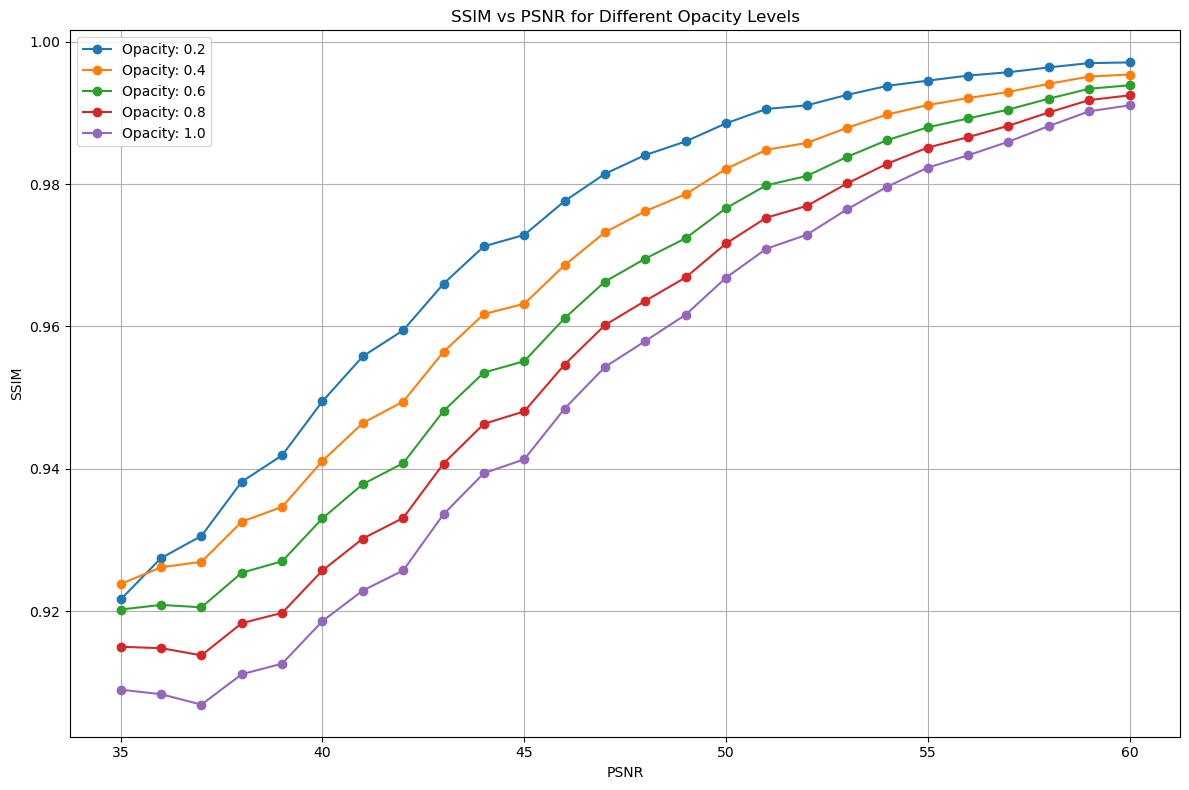

In [40]:
import os
import csv
import re
from skimage.metrics import structural_similarity as ssim
import cv2
import matplotlib.pyplot as plt

# Define the directory where screenshots are saved
output_directory = '/Users/yetchi/Desktop/analysis/output/opacity'

# Function to extract PSNR values from filenames
def extract_psnr(filename):
    match = re.search(r'(\d+)\.raw$', filename)
    return int(match.group(1)) if match else None

# Function to compute SSIM between two images
def compute_ssim(image_path1, image_path2):
    image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)
    return ssim(image1, image2)

# Load image paths from CSV file
csv_file = os.path.join(output_directory, "opacity_levels.csv")
image_paths = {}
reference_image_paths = {}

with open(csv_file, mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header row
    for row in reader:
        file_name, opacity_level, image_path = row
        opacity_level = float(opacity_level)
        if 'input.raw' in file_name:
            if opacity_level not in reference_image_paths:
                reference_image_paths[opacity_level] = []
            reference_image_paths[opacity_level].append(image_path)
        else:
            compression_level = file_name
            if compression_level not in image_paths:
                image_paths[compression_level] = {}
            if opacity_level not in image_paths[compression_level]:
                image_paths[compression_level][opacity_level] = []
            image_paths[compression_level][opacity_level].append(image_path)

# Extract PSNR values
psnr_values = sorted([extract_psnr(filename) for filename in image_paths.keys() if extract_psnr(filename) is not None])

# Initialize a dictionary to store SSIM results
opacity_levels = sorted(reference_image_paths.keys())
ssim_results = {opacity: [] for opacity in opacity_levels}

# Compute SSIM for each compressed image against the reference image at each opacity level
for compression_level in sorted(image_paths.keys(), key=lambda x: extract_psnr(x)):
    for opacity in opacity_levels:
        for ref_image_path in reference_image_paths[opacity]:
            for test_image_path in image_paths[compression_level][opacity]:
                ssim_value = compute_ssim(ref_image_path, test_image_path)
                ssim_results[opacity].append(ssim_value)

# Debugging: Print the computed SSIM values
print("Computed SSIM values:")
for opacity, values in ssim_results.items():
    print(f"Opacity: {opacity} -> SSIM: {values}")

# Check if PSNR and SSIM lists are correctly aligned
print("PSNR values:", psnr_values)

# Plot SSIM against PSNR for different opacity levels
plt.figure(figsize=(12, 8))
for opacity in opacity_levels:
    plt.plot(psnr_values, ssim_results[opacity], marker='o', label=f'Opacity: {opacity}')

plt.xlabel('PSNR')
plt.ylabel('SSIM')
plt.title('SSIM vs PSNR for Different Opacity Levels')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
